# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from Agent.ddpg_agent import Agent
from Agent.ddpg_agent_homogeneous import Agent_H
import random, torch, time
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
from torch.autograd import Variable

%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="C:/Users/u224870/OneDrive - SBB/Projekte/Udacity/Deep-Reinforcement-Learning/Tennis/Tennis_Windows_x86_64/Tennis_Windows_x86_64/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state bfor the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state bfor the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
num_agents = 2
agent = Agent_H(state_size=24, action_size=2 ,nbr_agents = 2, random_seed=2)
#agent_fixed = Agent_H(state_size=24, action_size=2 ,nbr_agents = 1, random_seed=2)

In [6]:
n_episodes=4000
print_every=100
scores_deque = deque(maxlen=print_every)
scores = np.zeros(num_agents)     

In [7]:
def ddpg(n_episodes=4000, max_t=1000):
    solved = False
    scores_window = deque(maxlen=100)
    scores = []
    total_time_elapsed = 0
    for i_episode in range(1, n_episodes+1):
        avg_score = 0
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores_t = np.zeros(num_agents)                        # initialize the score (for each agent)
        agent.reset()
        score = 0
        for t_step in range(max_t):
            actions = []
            actions = agent.act(states)
            #actions.append(agent.act(np.expand_dims(states[0],0)))
            #actions.append(agent_fixed.act(np.expand_dims(states[1],0)))
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished   
            agent.step(states, actions, rewards, next_states, dones, t_step)
            states = next_states
            scores_t += rewards

            if np.any(dones):
                break
        
        score = np.max(scores_t)
        scores_window.append(score)
        avg_score = np.mean(scores_window)
        scores.append(score)        
        

        print("\rEpisode {:}\t Average Score {:.2f}\tMax Score {:.2f}".format(i_episode, avg_score, np.max(scores)), end="")

        
        if i_episode % 100 == 0:
            print("\rEpisode {:}\t Average Score {:.2f}\tMax Score {:.2f}".format(i_episode, avg_score, np.max(scores)))
            torch.save(agent.actor_local.state_dict(), './Nets/checkpoint_actor'+str(i_episode)+'.pth')
            torch.save(agent.critic_local.state_dict(), './Nets/checkpoint_critic'+str(i_episode)+'.pth')
        #if i_episode % 50 == 0:           
        #    torch.save(agent.actor_local.state_dict(), './Nets/checkpoint_actor'+str(i_episode)+'.pth')
        #    torch.save(agent.critic_local.state_dict(), './Nets/checkpoint_critic'+str(i_episode)+'.pth')
        #    agent_fixed.load('./Nets/checkpoint_actor'+str(i_episode)+'.pth','./Nets/checkpoint_critic'+str(i_episode)+'.pth')
        if avg_score >= 0.5 and not solved:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, avg_score))
            torch.save(agent.actor_local.state_dict(), './Nets/final_actor.pth')
            torch.save(agent.critic_local.state_dict(), './Nets/final_critic.pth')
            solved = True

    return scores

In [8]:
torch.save(agent.actor_local.state_dict(), './Nets/checkpoint_actor.pth')
torch.save(agent.critic_local.state_dict(), './Nets/checkpoint_critic.pth')

Episode 100	 Average Score 0.00	Max Score 0.10
Episode 200	 Average Score 0.00	Max Score 0.10
Episode 300	 Average Score 0.00	Max Score 0.10
Episode 400	 Average Score 0.00	Max Score 0.10
Episode 500	 Average Score 0.00	Max Score 0.10
Episode 600	 Average Score 0.00	Max Score 0.10
Episode 700	 Average Score 0.01	Max Score 0.10
Episode 800	 Average Score 0.05	Max Score 0.19
Episode 900	 Average Score 0.00	Max Score 0.19
Episode 1000	 Average Score 0.02	Max Score 0.19
Episode 1100	 Average Score 0.06	Max Score 0.19
Episode 1200	 Average Score 0.05	Max Score 0.30
Episode 1300	 Average Score 0.09	Max Score 0.30
Episode 1400	 Average Score 0.09	Max Score 0.30
Episode 1500	 Average Score 0.09	Max Score 0.30
Episode 1600	 Average Score 0.12	Max Score 0.60
Episode 1700	 Average Score 0.16	Max Score 0.90
Episode 1800	 Average Score 0.22	Max Score 1.30
Episode 1900	 Average Score 0.17	Max Score 1.30
Episode 2000	 Average Score 0.19	Max Score 1.30
Episode 2100	 Average Score 0.27	Max Score 1.30
E

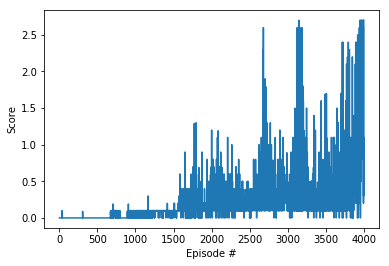

In [9]:
# Train agents
scores = ddpg()

#Plot results
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [10]:
scores_window = deque(maxlen=100)
scores_avg = []
for i in range(len(scores)):
    scores_window.append(scores[i])
    scores_avg.append(np.mean(scores_window))

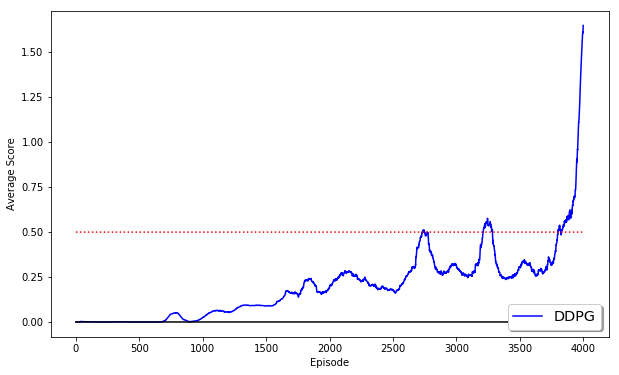

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(scores_avg,color ='b',  label='DDPG')
ax.plot(np.zeros(len(scores_avg)),'black')
ax.plot(0.5*np.ones(len(scores_avg)),'r:')
legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
plt.xlabel("Episode")
plt.ylabel("Average Score")
fig.savefig("./Images/Training.png")

In [12]:
env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores_t = np.zeros(num_agents)                        # initialize the score (for each agent)
agent.reset()
score = 0
t_step = 0
agent.load('./Nets/final_actor.pth','./Nets/final_critic.pth')
while True:
    actions = agent.act(states)     
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished   
    states = next_states
    scores_t += rewards
    if np.any(dones):
        break
print(np.mean(scores_t))

2.600000038743019


In [13]:
env.close()